In [8]:
using PyPlot # matplotlib plotting library

# cool plot theme. see https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html
PyPlot.matplotlib.style.use("bmh")

**learning objective:** 
* familiarize with some capabilities of the Julia programming language and Jupyter notebooks. 

disclaimer: I do not expect you to be a competent Julia programmer after this studio. I'm hoping, by the end of the class, you will have the competency to write simple programs to explore concepts in process dynamics and control. the programming in this studio is as hard as it gets.

in class next week, we'll numerically solve a differential equation together!

how to find out how to do something in Julia?
* check out the [Julia docs](https://docs.julialang.org/en/v1/)!
* Google "how do I ... in Julia?"

# Fibonacci sequence

construct an array of length 50, containing the first 50 numbers of the [Fibonacci sequence](https://en.wikipedia.org/wiki/Fibonacci_number). of course, write a program to compute the numbers as opposed to manually constructing an array with 50 entries.

hint: use a `for` loop.

In [9]:
F = zeros(50)
for i = 3:50
    F[1] = 0
    F[2] = 1
    F[i] = F[i-1] + F[i-2]
end
return F

50-element Array{Float64,1}:
   0.0
   1.0
   1.0
   2.0
   3.0
   5.0
   8.0
  13.0
  21.0
  34.0
  55.0
  89.0
 144.0
   ⋮
   3.9088169e7
   6.3245986e7
   1.02334155e8
   1.65580141e8
   2.67914296e8
   4.33494437e8
   7.01408733e8
   1.13490317e9
   1.836311903e9
   2.971215073e9
   4.807526976e9
   7.778742049e9

# plotting

plot the function:
$y(t)=e^{-t}\sin(10 t)$
over the domain $t\in[0, 6]$. include an x- and y-axis label on your plot. make sure you have enough resolution in your `t` array so that the plot appears smooth.

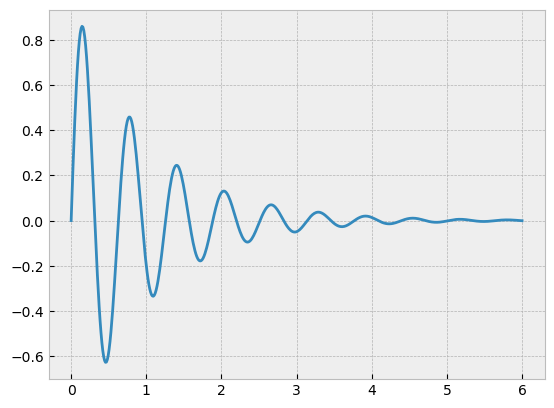

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000048DAFB50>

In [10]:
y(t) = exp(-t) * sin(10 * t)
t = collect(range(0, 6, length = 500));

figure()
plot(t, y.(t))

# sine function

the sine function is sometimes *defined* in terms of the infinite series:

$\sin(x):=\displaystyle\sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)!} x^{2n+1}$

see [here](https://en.wikipedia.org/wiki/Sine#Series_definition). on the computer, we can compute the truncated sum:

$\sin(x) \approx \displaystyle\sum_{n=0}^N \frac{(-1)^n}{(2n+1)!} x^{2n+1}$


write a function `my_sin(x, N)` that uses `N`+1 terms to compute the truncated sum above for $x=$`x`.

In [11]:
function my_sin(x, N)
    s = 0.0
    for n = 0:N
    s = s + (((-1) ^ n) / (factorial(2 * n + 1))) * (x ^ (2 * n + 1)) 
    end
    return s
end

my_sin (generic function with 1 method)

compare $\sin(1)$ computed with:
* Julia's implementation of `sin`
* the truncated sum with `N=6` terms, using `my_sin`
they should be close.

In [5]:
sin(1)

0.8414709848078965

In [6]:
my_sin(1,6)

0.8414709848086585

for the same comparision, but over many more $x$ values, make a plot of $\sin(x)$ over the domain $x\in[0, 2\pi]$ using:
* Julia's implementation, `sin`
* the truncated sum implementation, via `my_sin`, with `N=6`

plot each approximation of $\sin(x)$ on the same plot, with two different colors. use a legend to indicate which line corresponds to which implementation. label your x- and y-axes, and put a title on the plot too.

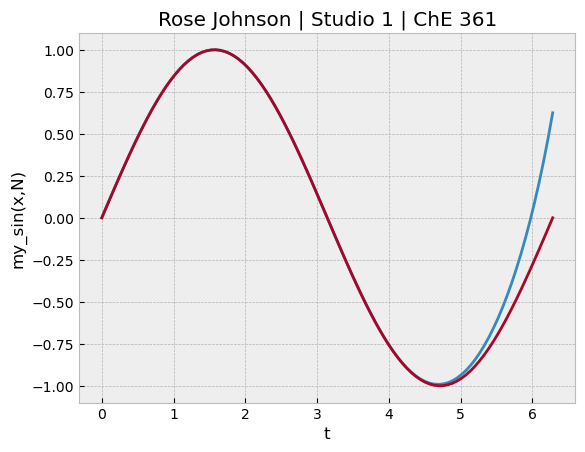

PyObject Text(26.203125, 0.5, 'my_sin(x,N)')

In [7]:
x = collect(range(0, 2*pi, length = 100))

plot(x, my_sin.(x,6))
plot(x, sin.(x))

title("Rose Johnson | Studio 1 | ChE 361")
xlabel("t")
ylabel("my_sin(x,N)")

increase `N` and rerun the code cell to see a better approximation. note you can't make `N` too large because `factorial` grows so fast that the computer is incapable of storing such large numbers!

# if you made it here...

wow!

🐰 go back to your Fibonnaci sequence array, and code it up in a different way.

🐰🐰 include a loop over `N`, `for N=1:9`, and plot a series of 9 curves that approximate $\sin(x)$. this way you can see the approximation get better as `N` increases.